# Finding the minimum of a function

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

In [2]:
# Define the arbitrary function
def arbitrary(x):
    return (x**4 - 15*x**3 + 80*x**2 - 180*x + 144) / 10

In [3]:
# Create a range of x values
x_values = np.linspace(1, 6.75, 200)
print("x values")
print(x_values[:10])
print()

# Calculate y values using the arbitrary function
y_values = arbitrary(x_values)
print("y values")
print(y_values[:10])
print()

x values
[1.         1.02889447 1.05778894 1.08668342 1.11557789 1.14447236
 1.17336683 1.20226131 1.23115578 1.26005025]

y values
[3.         2.8271403  2.66096847 2.50132779 2.34806323 2.20102143
 2.06005069 1.92500102 1.79572405 1.67207313]


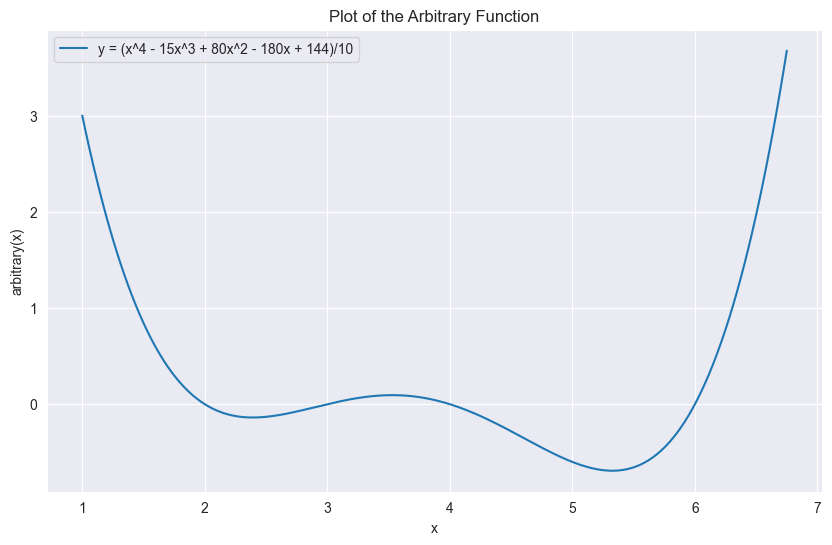

In [4]:
# Plotting the function
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='y = (x^4 - 15x^3 + 80x^2 - 180x + 144)/10')
plt.title('Plot of the Arbitrary Function')
plt.xlabel('x')
plt.ylabel('arbitrary(x)')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
# Derivative of the arbitrary function
def derivative(x):
    return (4*x**3 - 45*x**2 + 160*x - 180) / 10

In [6]:
# Gradient Descent Function
def gradient_descent(starting_x, learning_rate, num_iterations):
    x = starting_x
    for i in range(num_iterations):
        grad = derivative(x)
        x = x - learning_rate * grad
    return x

In [7]:
# Parameters for gradient descent
starting_x = 3  # Initial guess
learning_rate = 0.01  # Learning rate
num_iterations = 1000  # Number of iterations

In [8]:
# Perform gradient descent
minimum_x = gradient_descent(starting_x, learning_rate, num_iterations)
minimum_y = arbitrary(minimum_x)

In [9]:
minimum_x, minimum_y

(2.3927506568306978, -0.13827491293947106)

### Using Scipy

In [10]:
from scipy.optimize import minimize
minimize(arbitrary, x0 = 0)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -0.1382749129442459
        x: [ 2.393e+00]
      nit: 9
      jac: [ 3.818e-07]
 hess_inv: [[ 7.473e-01]]
     nfev: 20
     njev: 10

# Gradient descent on a data set

In [11]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [12]:
# Load a standard dataset (Diabetes dataset)
X, y = load_diabetes(return_X_y=True)

In [13]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Batch Gradient Descent
Uses the entire dataset

In [14]:
# Batch Gradient Descent
batch_size = len(X_train)
batch_sgd_reg = SGDRegressor(max_iter=1, learning_rate='constant', eta0=0.001, random_state=42)

# Manual loop for batch gradient descent
for _ in range(1000):
    batch_sgd_reg.partial_fit(X_train, y_train)

# Evaluation
y_pred = batch_sgd_reg.predict(X_test)
print(f'Batch Gradient Descent MSE: {mean_squared_error(y_test, y_pred)}')

Batch Gradient Descent MSE: 2932.072839729517


###  Stochastic Gradient Descent
- Uses just one example at each iteration
- Scikit-learn by default uses this approach

In [15]:
# Stochastic Gradient Descent
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X_train, y_train)

# Evaluation
y_pred = sgd_reg.predict(X_test)
print(f'Stochastic Gradient Descent MSE: {mean_squared_error(y_test, y_pred)}')

Stochastic Gradient Descent MSE: 3111.880568911598


###  Mini-batch Gradient Descent
- A compromise between the two
- `partial_fit`

In [16]:
# Mini-batch Gradient Descent
mini_batch_size = 20
mini_sgd_reg = SGDRegressor(max_iter=1, learning_rate='constant', eta0=0.001, random_state=42)

# Manual loop for mini-batch gradient descent
for _ in range(1000):
    for i in range(0, len(X_train), mini_batch_size):
        mini_sgd_reg.partial_fit(X_train[i:i + mini_batch_size], y_train[i:i + mini_batch_size])

# Evaluation
y_pred = mini_sgd_reg.predict(X_test)
print(f'Mini-batch Gradient Descent MSE: {mean_squared_error(y_test, y_pred)}')

Mini-batch Gradient Descent MSE: 2933.7373566112674


# Difference between `LinearRegression` and `SGDRegressor`

- LR uses the Ordinary Least Squares (OLS) method to minimize the sum of the squared differences between the observed and predicted values (residuals).
- SGD uses the stochastic gradient descent (SGD) optimization method to find the model parameters. This method updates the model's weights incrementally for each training sample in a random order.

# Gradient descent in classification?

Using gradient descent with a classification model involves the same fundamental principles as with any other machine learning model. The goal is to optimize the model's parameters (like weights in a neural network) by iteratively reducing a loss function.

In [17]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

# Generate a synthetic binary classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression model with Gradient Descent
class LogisticRegressionGD:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient Descent
        for _ in range(self.n_iterations):
            model = np.dot(X, self.weights) + self.bias
            predictions = self._sigmoid(model)

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (predictions - y))
            db = (1 / n_samples) * np.sum(predictions - y)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        model = np.dot(X, self.weights) + self.bias
        predictions = self._sigmoid(model)
        return [1 if i > 0.5 else 0 for i in predictions]

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

# Initialize and train the model
log_reg = LogisticRegressionGD(learning_rate=0.01, n_iterations=1000)
log_reg.fit(X_train, y_train)

# Predict on test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
loss = log_loss(y_test, y_pred)
print(f"Log Loss: {loss}")

Log Loss: 4.685674940585229


This is a basic example to illustrate the concept. In practice, especially for complex models like deep neural networks, libraries like TensorFlow or PyTorch are typically used as they provide more optimized and robust implementations of gradient descent.





